In [5]:
"""
One hot encoding

One-hot encoding is the most common, most basic way to turn a token into a vector.
"""
import numpy as np
import string

samples = {'The cat sat on the mat.', 'The dog ate my homework.'}

# Word-level one-hot encoding 
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length_per_sample = 10
results = np.zeros(shape=(len(samples), max_length_per_sample, max(token_index.values()) + 1))  # sample num, word num, word vector num
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length_per_sample]:
        index = token_index.get(word)
        results[i, j, index] = 1.
print("word-level one-hot encoding:")
print(token_index)
print(results)


# Character-level one-hot encoding
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length_per_sample = 50
results = np.zeros((len(samples), max_length_per_sample, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length_per_sample]):
        index = token_index.get(character)
        results[i, j, index] = 1.
print("character-level one-hot encoding:")
print(token_index)
print(results)

word-level one-hot encoding:
{'The': 1, 'dog': 2, 'ate': 3, 'my': 4, 'homework.': 5, 'cat': 6, 'sat': 7, 'on': 8, 'the': 9, 'mat.': 10}
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
character-level one-hot encoding:
{1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 11: 

In [8]:
"""
Note that Keras has built-in utilities for doing one-hot encoding of text at the word level or character level, starting from raw text data.
You should use these utilities, because they take care of a number of important features such as stripping special characters from strings
and only taking into account the N most common words in your dataset (a common restriction, to avoid dealing with very large input vector
spaces).
"""
from keras.preprocessing.text import Tokenizer


# only take into account 1000 most words
tokenizer = Tokenizer(num_words=1000)

# build the word index
tokenizer.fit_on_texts(samples)
print("word index:", tokenizer.word_index)

# turn the string into list of integer indices
sequences = tokenizer.texts_to_sequences(samples)
print("sequences: ", sequences)

# turn the string into one-hot binary representation
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print("one hot encoding: ", one_hot_results)

word index: {'the': 1, 'dog': 2, 'ate': 3, 'my': 4, 'homework': 5, 'cat': 6, 'sat': 7, 'on': 8, 'mat': 9}
sequences:  [[1, 2, 3, 4, 5], [1, 6, 7, 8, 1, 9]]
one hot encoding:  [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [10]:
"""
One-hot hashing trick

A variant of one-hot encoding is the so-called one-hot hashing trick, which you can use when the number of unique tokens in your vocabulary
is too large to handle explicitly. Instead of explicitly assigning an index to each word and keeping a reference of these indices in
a dictionary, you can hash words into vectors of fixed size. This is typically done with a very lightweight hashing function. The main
advantage of this method is that it does away with maintaining an explicit word index, which saves memory and allows online encoding
of the data (you can generate token vectors right away, before you’ve seen all of the available data). The one drawback of this approach
is that it’s susceptible to hash collisions: two different words may end up with the same hash, and subsequently any machine-learning model
looking at these hashes won’t be able to tell the difference between these words. The likelihood of hash collisions decreases when
the dimensionality of the hashing space is much larger than the total number of unique tokens being hashed.
"""

dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))

# hashes the word into a random integer index between 0 and 1,000
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.
print("one-hot hashing:")
print(results)

one-hot hashing:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [11]:
"""
Using word embedding

1. Another popular and powerful way to associate a vector with a word is the use of dense word vectors, also called word embeddings.
   Whereas the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros), and very high-dimensional (same
   dimensionality as the number of words in the vocabulary), word embeddings are lowdimensional floating-point vectors (that is, dense
   vectors, as opposed to sparse vectors). Unlike the word vectors obtained via one-hot encoding, wordembeddings are learned from data.
   It’s common to see word embeddings that are 256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with very large
   vocabularies. On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or greater (capturing
   a vocabulary of 20,000 tokens, in this case). So, word embeddings pack more information into far fewer dimensions.

2. There are two ways to obtain word embeddings:
   -- Learn word embeddings jointly with the main task you care about (such as document classification or sentiment prediction).
      In this setup, you start with random word vectors and then learn word vectors in the same way you learn the weights of
      a neural network.
   -- Load into your model word embeddings that were precomputed using a different machine-learning task than the one you’re trying
      to solve. These are called pretrained word embeddings.

3.  The geometric relationships between word vectors should reflect the semantic relationships between these words. Word embeddings are
    meant to map human language into a geometric space. For instance, in a reasonable embedding space, you would expect synonyms to be
    embedded into similar word vectors; and in general, you would expect the geometric distance (such as L2 distance) between any two word
    vectors to relate to the semantic distance between the associated words (words meaning different things are embedded at points far away
    from each other, whereas related words are closer). In addition to distance, you may want specific directions in the embedding space
    to be meaningful.

4. What makes a good word-embedding space depends heavily on your task: the perfect word-embedding space for an English language movie
   review sentimentanalysis model may look different from the perfect embedding space for an English language legal-document-classification
   model, because the importance of certain semantic relationships varies from task to task.

5. It’s thus reasonable to learn a new embedding space with every new task. 
"""
from keras.layers import Embedding

# vocab num, word vector dim
embedding_layer = Embedding(1000, 64) 

In [16]:
"""
Keras Embedding


1. The Embedding layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors.
   It takes integers as input, it looks up these integers in an internal dictionary, and it returns the associated vectors. 

2. The Embedding layer takes as input a 2D tensor of integers, of shape (samples, sequence_length), where each entry is a sequence of
   integers. It can embed sequences of variable lengths: for instance, you could feed into the Embedding layer in the previous example
   batches with shapes (32, 10) (batch of 32 sequences of length 10) or (64, 15) (batch of 64 sequences of length 15). All sequences in
   a batch must have the same length, though (because you need to pack them into a single tensor), so sequences that are shorter than others
   should be padded with zeros, and sequences that are longer should be truncated. This layer returns a 3D floating-point tensor of shape
   (samples, sequence_length, embedding_dimensionality). Such a 3D tensor can then be processed by an RNN layer or a 1D convolution layer.

3. When you instantiate an Embedding layer, its weights (its internal dictionary of token vectors) are initially random, just as with any
   other layer. During training, these word vectors are gradually adjusted via backpropagation, structuring the space into something the
   downstream model can exploit. Once fully trained, the embedding space will show a lot of structure—a kind of structure specialized for
   the specific problem for which you’re training your model.

4. Note that merely flattening the embedded sequences and training a single Dense layer on top leads to a model that treats each word in
   the input sequence separately, without considering inter-word relationships and sentence structure. It’s much better to add recurrent
   layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole.
"""
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense

max_features = 10000
maxlen = 20

# load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print("load data: ", x_train.shape, x_test.shape)

# turn the list of integers to 2d integer tensor of shape
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print("pad & truncat data: ", x_train.shape)

# model
model = Sequential()

# specifies the maximum input length to the Embedding layer so you can later flatten the embedded inputs.
# After the Embedding layer, the activations have shape (samples, maxlen, 8).
model.add(Embedding(10000, 8, input_length=maxlen))

# flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)
model.add(Flatten())

# classifier 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

load data:  (25000,) (25000,)
pad & truncat data:  (25000, 20)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 60us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 50us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


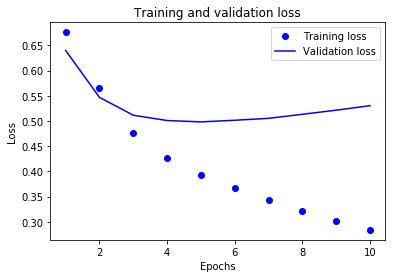

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')   # blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  #blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

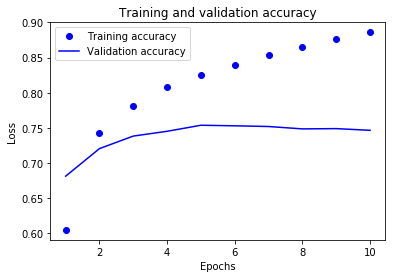

In [19]:
plt.clf()

# training & validation accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')   # blue dot
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')  #blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
"""
Processing the labels of the raw IMDB data
"""
import os

imdb_dir = './data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [20]:
"""
Tokenizing the data
"""
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


# Cuts off reviews after 100 words; Trains on 200 samples;
# Validates on 10,000 samples; Considers only the top 10,000 words in the dataset
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

# tokenize
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# text to seq
sequences = tokenizer.texts_to_sequences(texts)
print('sequences length: ', len(sequences))

# turn to 2d numpy array
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# train & valid data split
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
sequences length:  25000
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [21]:
"""
Parsing GloVe file
"""

glove_dir = './model/glove.6b'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [23]:
"""
Preparing the GloVe word-embeddings matrix

It must be a matrix of shape (max_words, embedding_dim), where each entry i contains the embedding_dim-dimensional vector for the word
of index i in the reference word index (built during tokenization). Note that index 0 isn’t supposed to stand for any word or token —
it’s a placeholder.
"""

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        # Words not found in the embedding index will be all zeros. 
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [24]:
"""
Defining & Training the model
"""
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# define model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

# load the pretrained word embedding into the Embedding layer; additionally, you’ll freeze the Embedding layer 
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# train the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

# save the model
model.save_weights('./model/pre_trained_glove_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
None
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 2.2109 - acc: 0.4550 - val_loss: 0.8297 - val_acc: 0.5010
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.526

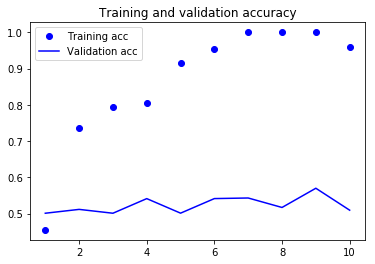

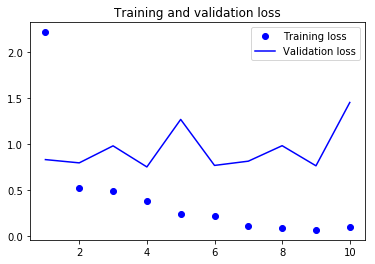

In [25]:
"""
Plotting the result

The model quickly starts overfitting, which is unsurprising given the small number of training samples. Validation accuracy has high
variance for the same reason, but it seems to reach the high 50s.
"""
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
None
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6992 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5075
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.521

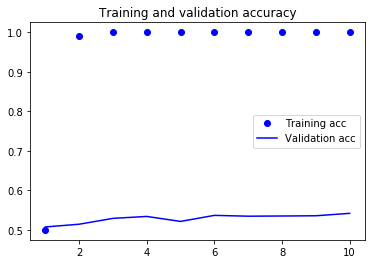

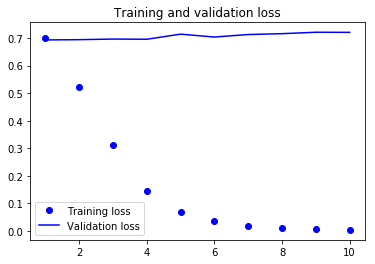

In [27]:
"""
Training without oretrained word embedding

Train the same model without loading the pretrained word embeddings and without freezing the embedding layer. 
"""
model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
"""
Evaluate the model on the test data
"""
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

model.load_weights('./model/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)


25000/25000 [==============================] - 1s 25us/step


[1.4525155463552475, 0.51344]